In [15]:
import sys
import os
sys.path.insert(0, os.getcwd()+'/src/')
from myImports import *
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
n_days = 20 # number of days to extract 

In [17]:
Temps = [295, 300, 305]
Diagnos = ['mean', 'max']

## Import Mean and compute Distrib

In [18]:
Mean_295 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_mean_with_295K_for_{n_days}days.nc")["Prec"].to_numpy()
Mean_300 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_mean_with_300K_for_{n_days}days.nc")["Prec"].to_numpy()
Mean_305 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_mean_with_305K_for_{n_days}days.nc")["Prec"].to_numpy()
Means = [Mean_295, Mean_300, Mean_305]

In [19]:
Distrib_Means = []
for i, mean in enumerate(Means):
    Distrib_Means.append(cs.Distribution(name=f"Mean {Temps[i]}", bintype = "invlogQ", nd = 4, fill_last_decade=True))
    Distrib_Means[i].computeDistribution(mean)

## Import Max and compute Distrib

In [20]:
Max_295 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_max_with_295K_for_{n_days}days.nc")["Prec"].to_numpy()
Max_300 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_max_with_300K_for_{n_days}days.nc")["Prec"].to_numpy()
Max_305 = xr.open_dataset(f"../outputs/rcemip_prec_1°x1day_remeshed_by_max_with_305K_for_{n_days}days.nc")["Prec"].to_numpy()
Maxs = [Max_295, Max_300, Max_305]

In [21]:
Distrib_Maxs = []
for i, max in enumerate(Maxs):
    Distrib_Maxs.append(cs.Distribution(name=f"Mean {Temps[i]}", bintype = "invlogQ", nd = 4, fill_last_decade=True))
    Distrib_Maxs[i].computeDistribution(max)

# Compute and Plot jointDistrib normalized density per Temps

In [22]:
MeanMax_JDs = []
for temp, mean, dist_mean, max, dist_max, i in zip(Temps, Means, Distrib_Means, Maxs, Distrib_Maxs, range(len(Temps))):
    MeanMax_JDs.append(cs.JointDistribution(name='MeanMax JD {temp}',distribution1=dist_mean, distribution2=dist_max))
    MeanMax_JDs[i].computeNormalizedDensity(mean, max, data = None)


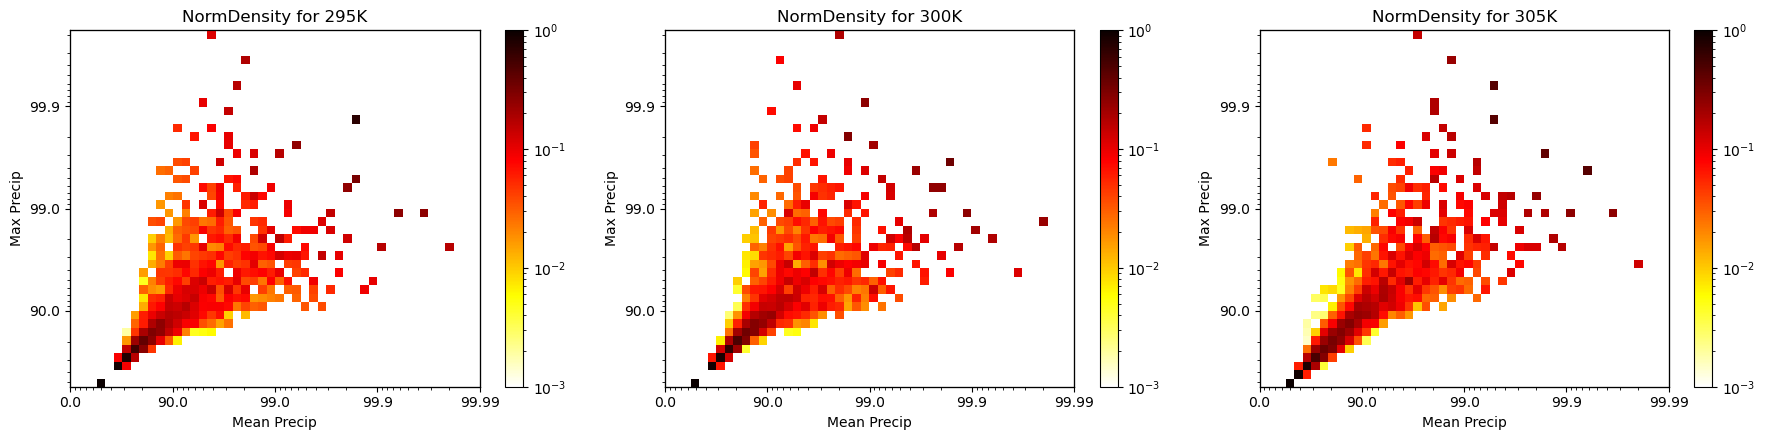

In [23]:
# Show joint distribution
# frame IL
fig,axs = plt.subplots(ncols = 3, figsize=(3*6,4.5))

for dist_mean, dist_max, meanmax_jd, ax, temp in zip(Distrib_Means,Distrib_Maxs, MeanMax_JDs, axs.flatten(), Temps):

    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, dist_mean.ranks, dist_max.ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 
    ax.set_title(f"NormDensity for {temp}K")

    # values
    Z = meanmax_jd.density.T
    h = showJointHistogram(ax_show, Z, scale = 'log', cmap = 'hot_r') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"
    fig.colorbar(h)

plt.tight_layout()
plt.show()

# Relative Variation of Precipitation wrt Temperature over density.

In [24]:
Reverses = [True, False]
RelVar_Mean =[]
RelVar_Max = []

relvar_mean, relvar_max = MeanMax_JDs[1].computeVariationOverDensity(Means[1], Means[0], Distrib_Means[0].bins,
                                                                         Maxs[1], Maxs[0], Distrib_Maxs[0].bins, True)
RelVar_Mean.append(relvar_mean)
RelVar_Max.append(relvar_max)

relvar_mean, relvar_max = MeanMax_JDs[1].computeVariationOverDensity(Means[1], Means[2], Distrib_Means[2].bins,
                                                                         Maxs[1], Maxs[2], Distrib_Maxs[2].bins, False)

RelVar_Mean.append(relvar_mean)
RelVar_Max.append(relvar_max)

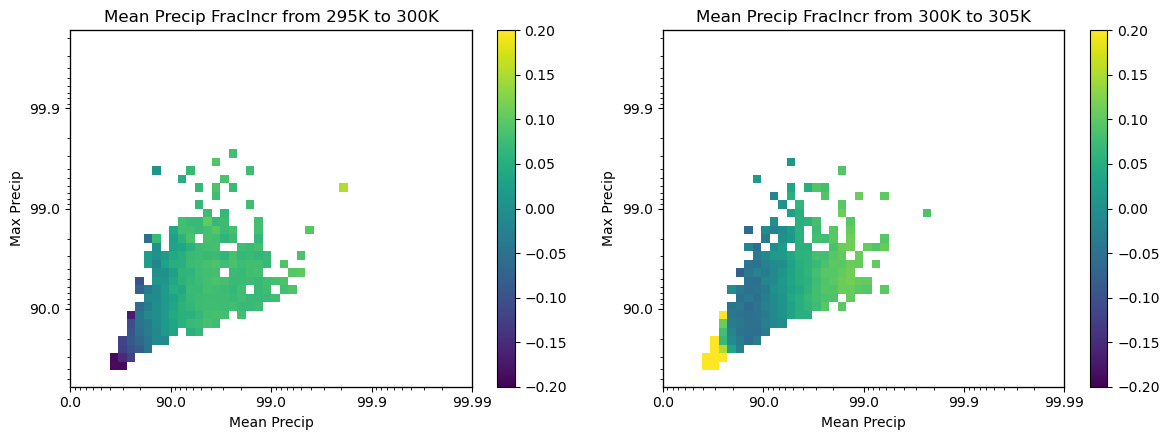

In [25]:
# Show joint distribution
# frame IL
fig,axs = plt.subplots(ncols = 2, figsize=(2*6,4.5))

for relvar_mean, ax, i in zip(RelVar_Mean, axs.flatten(), range(2)):

    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, Distrib_Means[1].ranks, Distrib_Maxs[1].ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 
    ax.set_title(f"Mean Precip FracIncr from {Temps[i]}K to {Temps[i+1]}K")

    # values
    Z = relvar_mean.T
    h = showJointHistogram(ax_show, Z, scale = 'lin', vmin =-0.20, vmax = 0.20, cmap = 'viridis') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"
    fig.colorbar(h)

plt.tight_layout()
plt.show()

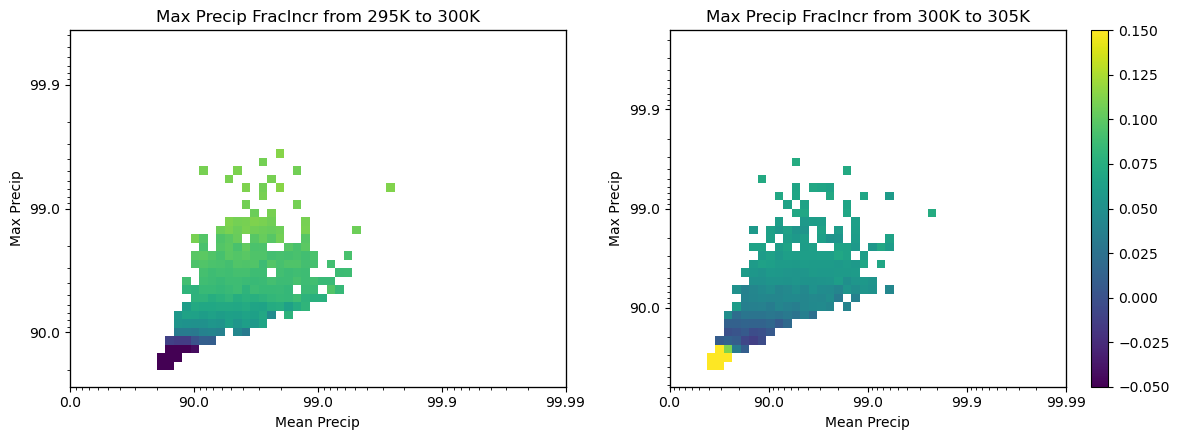

In [26]:
# Show joint distribution
# frame IL
fig,axs = plt.subplots(ncols = 2, figsize=(2*6,4.5))

for relvar_max, ax, i in zip(RelVar_Max, axs.flatten(), range(2)):

    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, Distrib_Means[1].ranks, Distrib_Maxs[1].ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 
    ax.set_title(f"Max Precip FracIncr from {Temps[i]}K to {Temps[i+1]}K")

    # values
    Z = relvar_max.T
    h = showJointHistogram(ax_show, Z, scale = 'lin', vmin =-0.05, vmax = 0.15, cmap = 'viridis') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"

plt.colorbar(h)
plt.tight_layout()
plt.show()

In [27]:
np.mean(Means[0]) #3.187865
np.mean(Means[1]) #3.823304
np.mean(Means[2]) #4.3

np.mean(Maxs[0])  #991.5458
np.mean(Maxs[1]) #1162.1705
np.mean(Maxs[2]) #1444.5486

1444.5486

In [30]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize = (6, 4.5))
# to_plot = [Distrib_Means, Distrib_Maxs]
# for i, row in enumerate(range(axs.shape[0])):
#     data = to_plot[i]
#     for data, ax in zip(): 


# Interpolate Mean and Max Precip data over bin_space

In [31]:
Precip_Means=[]
Precip_Maxs=[]
for i,temp in enumerate(Temps):
    Precip_Means.append(MeanMax_JDs[i].computeNormalizedDensity(Means[i], Maxs[i], data = Means[i]))
    Precip_Maxs.append(MeanMax_JDs[i].computeNormalizedDensity(Means[i], Maxs[i], data = Maxs[i]))

/home/mcarenso/code/conditional-stats/src/conditionalstats.py:813: RuntimeWarning: Mean of empty slice
  data_over_density[i1, i2] = np.nanmean(data[data_idx])


In [32]:
from myFuncs import interpolate_nan_values

InterPrecip_Means = []
InterPrecip_Maxs = []
for mean, max in zip(Precip_Means, Precip_Maxs):
    InterPrecip_Means.append(interpolate_nan_values(mean))
    InterPrecip_Maxs.append(interpolate_nan_values(max)) 

test = InterPrecip_Means[0]

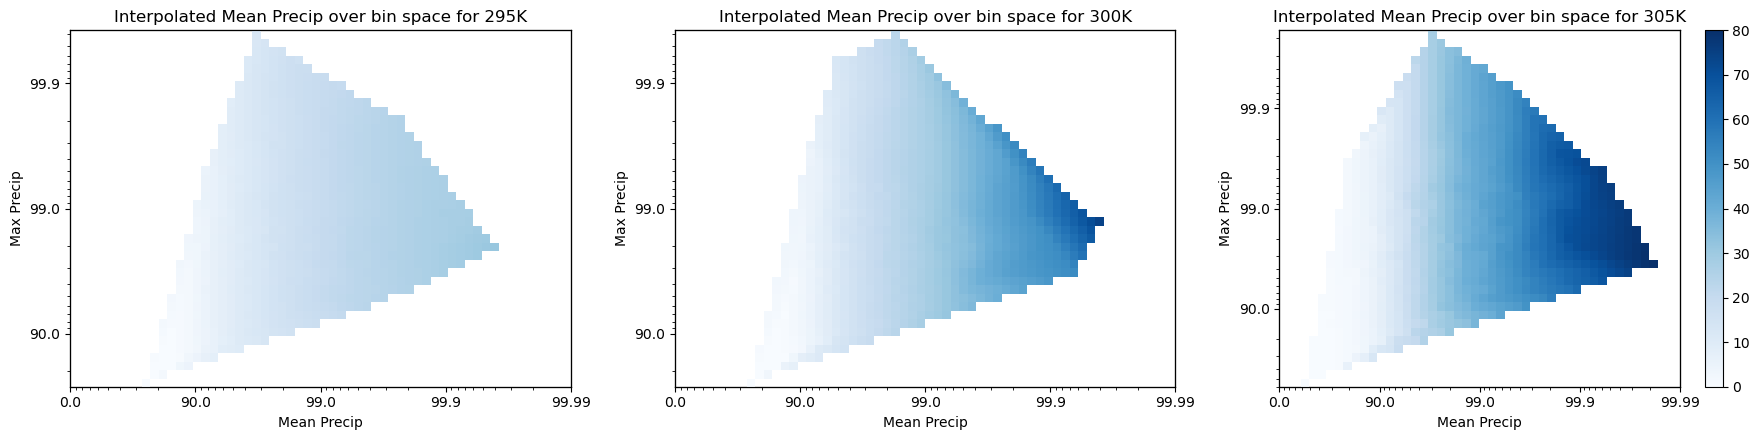

In [33]:
# Show joint distribution
# frame IL
fig,axs = plt.subplots(ncols = 3, figsize=(3*6,4.5))


for dist_mean, dist_max, data, ax, temp in zip(Distrib_Means,Distrib_Maxs, InterPrecip_Means, axs.flatten(), Temps):

    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, dist_mean.ranks, dist_max.ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 
    ax.set_title(f"Interpolated Mean Precip over bin space for {temp}K")

    # values
    Z = data.T
    h = showJointHistogram(ax_show, Z, scale = 'lin', vmin = 0, vmax = 80, cmap = 'Blues') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"

plt.colorbar(h)
plt.tight_layout()
plt.show()

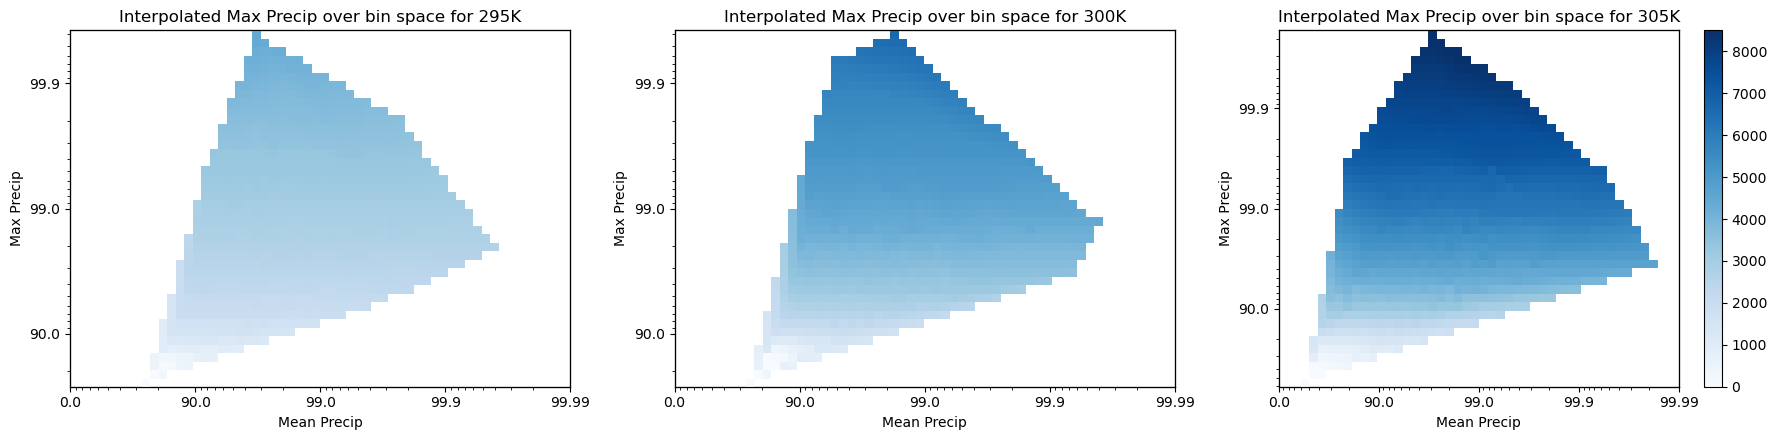

In [34]:
# Show joint distribution
# frame IL
fig,axs = plt.subplots(ncols = 3, figsize=(3*6,4.5))


for dist_mean, dist_max, data, ax, temp in zip(Distrib_Means,Distrib_Maxs, InterPrecip_Maxs, axs.flatten(), Temps):

    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, dist_mean.ranks, dist_max.ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 
    ax.set_title(f"Interpolated Max Precip over bin space for {temp}K")

    # values
    Z = data.T
    h = showJointHistogram(ax_show, Z, scale = 'lin', vmin = 0, vmax = 8500, cmap = 'Blues') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"
    
fig.colorbar(h)
plt.tight_layout()
plt.show()

# Let's curve lm*fit : Definition firsts 

In [68]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from lmfit import Model 

In [70]:
def lnP(temp, a, cc):
    return a + cc*temp

In [130]:
from myFuncs import fit_interPrec

# Max 

In [135]:
max_cc_values, max_redchi_values = fit_interPrec(InterPrecip_Maxs, lnP)
mean_cc_values, mean_redchi_values = fit_interPrec(InterPrecip_Means, lnP)

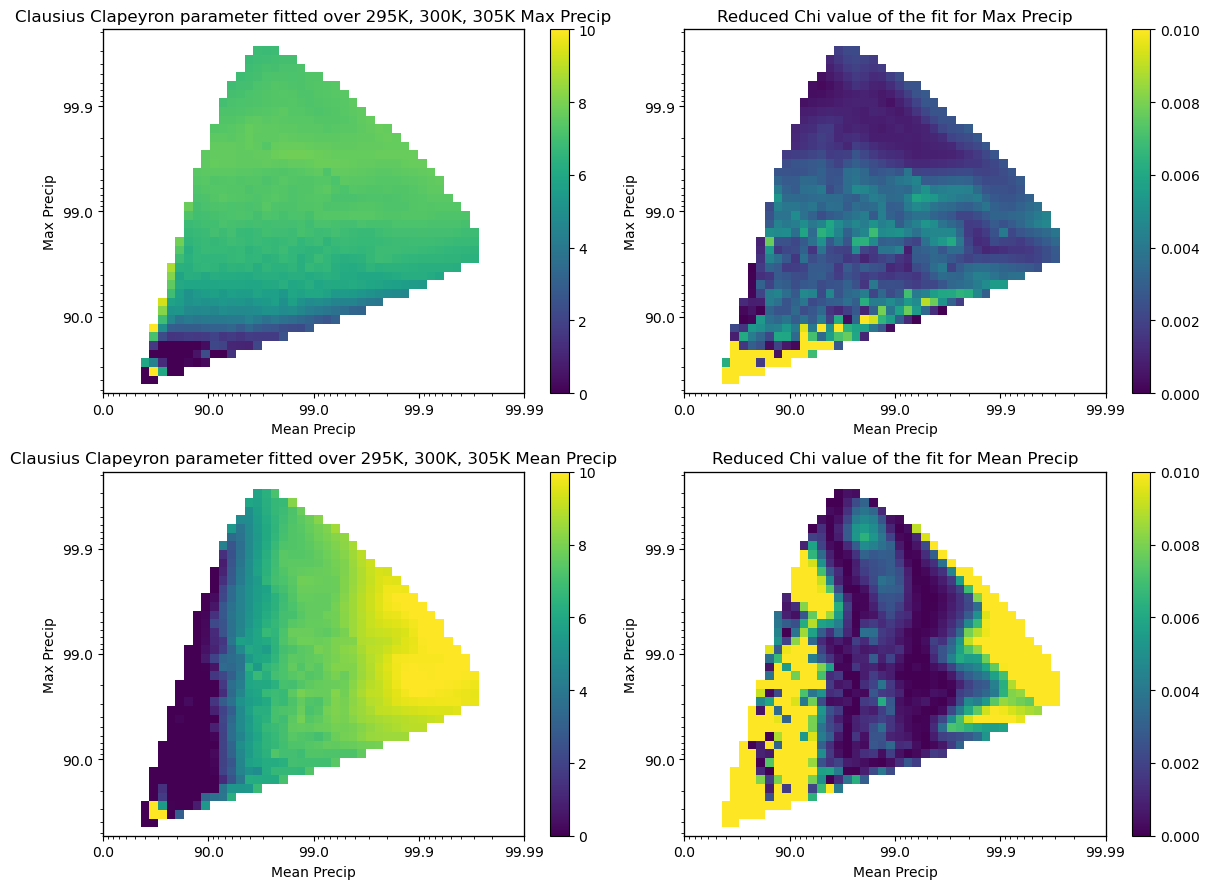

In [137]:
fig,axs = plt.subplots(ncols = 2, nrows = 2, figsize=(2*6,2*4.5))
Zs = [max_cc_values.T, max_redchi_values.T, mean_cc_values.T, mean_redchi_values.T]
vmaxs = [10, 0.01, 10, 0.01]
titles = ["Clausius Clapeyron parameter fitted over 295K, 300K, 305K Max Precip", "Reduced Chi value of the fit for Max Precip", 
          "Clausius Clapeyron parameter fitted over 295K, 300K, 305K Mean Precip", "Reduced Chi value of the fit for Mean Precip", ]
for Z, vmax, title, ax in zip(Zs, vmaxs, titles, axs.flatten()):
    ax_show = ax.twinx().twiny()
    ax = setFrameIL(ax, Distrib_Means[1].ranks, Distrib_Maxs[1].ranks, xlabel = "Mean Precip", ylabel = "Max Precip") ## the given ax object must not be ax_show. 

    # values
    h = showJointHistogram(ax_show, Z, scale = 'lin', vmin = 0, vmax = vmax, cmap = 'viridis') ## Here the given ax object must be ax_show. that's what it means "regardless of preset frame and ticks"
    ax.set_title(title)

    plt.colorbar(h)
plt.tight_layout()
plt.show()

# Mean